# Loan Application Status Prediction

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Above is the dataset of this perticular problem.And i have to predict wheather the loan will be approved or not so Loan_Status is my target columns and the data type is categorical so it's a classification problem.

In [3]:
#Checking shape of dataset
df.shape

(614, 13)

In [4]:
#Checking all column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#Checking the data types of all columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#There are some null values in some of the columns and i have to replace those null values.

#Checking unique values of each column
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.

for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
****************************************
Male      489
Female    112
Name: Gender, dtype: int64
****************************************
Yes    398
No     213
Name: Married, dtype: int64
****************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
****************************************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
****************************************
0.0       273
2500.0      5
2083.0      5
1666.0      5
2

In [9]:
# the value counts of each column and in LoanID column all the values are unique so no need to keep this column

In [10]:
#Droping Loan_ID column
df = df.drop(["Loan_ID"],axis=1)

In [12]:
# in CoapplicantIncome column there is about 45% zeros i have to replace that.

#Replacing zeros in CoapplicantIncome by median
df["CoapplicantIncome"].replace(0, df["CoapplicantIncome"].median(),inplace = True)

In [13]:
#Checking for skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    9.220570
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [14]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1188.5,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1188.5,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1188.5,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1188.5,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1188.5,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1188.5,187.0,360.0,1.0,Urban,Y


In [15]:
#Checking null values in the dataset
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

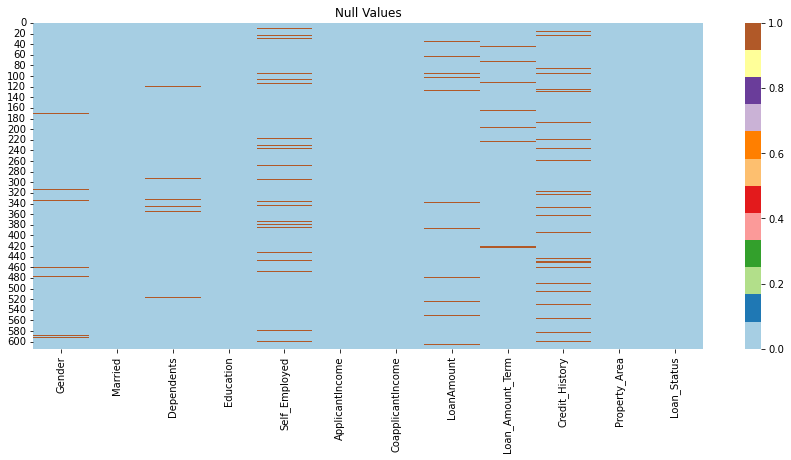

In [17]:
#Visualizeing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull(),cmap="Paired")
plt.title("Null Values")
plt.show()

#By visualization i can notice the null values.

Imputation technique to replace NaN values:
There is skewness in all the numerical column so i can not replace the NaN values with mean i have replace it with median.



In [18]:
#Replacing NaN values in numerical columns
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [22]:
#Replacing null values in categorical columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [23]:
#Again checking the NaN values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
#Checking unique values of target column
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [25]:
#Checking for empty observations
df.loc[df['Loan_Status'] == " "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [26]:
#There is no empty observations in my target column.

In [27]:
#Checking description of data set
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,2149.683094,145.752443,342.410423,0.855049
std,6109.041673,2682.545729,84.107233,64.428629,0.352339
min,150.000000,16.120001,9.000000,12.000000,0.000000
25%,2877.500000,1188.500000,100.250000,360.000000,1.000000
50%,3812.500000,1199.250000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [28]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)


['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [29]:
#Above are the list of categorical columns.

# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


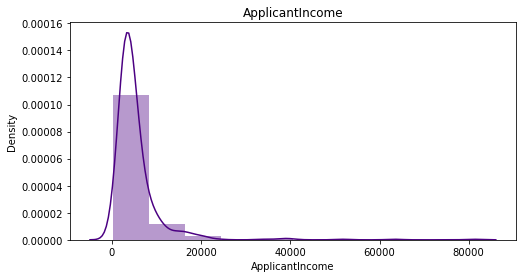

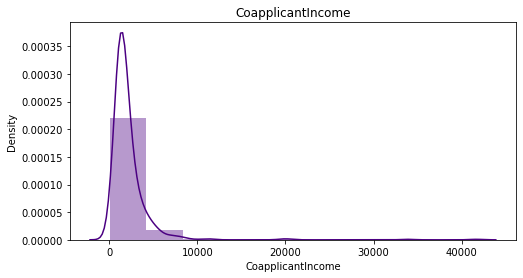

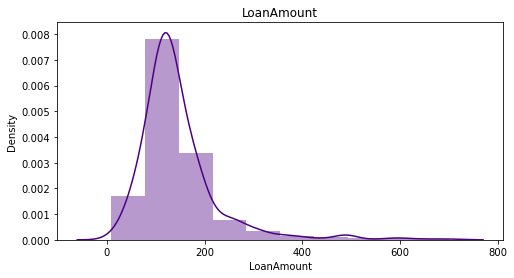

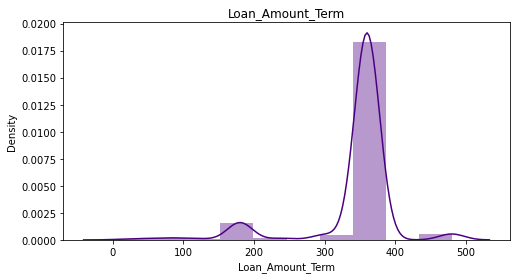

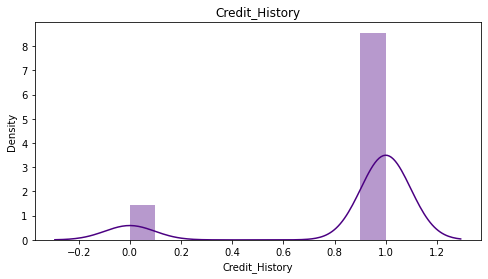

In [30]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

In [31]:
#Checking the value counts of Gender column
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

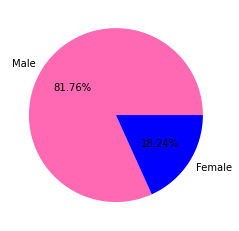

In [33]:
#Ploting pie chart for Gender
labels='Male','Female'
colors = ["hotpink", "b"]
fig, ax = plt.subplots()
ax.pie(df['Gender'].value_counts(), labels=labels,colors=colors, autopct='%1.2f%%')
plt.show()

In [34]:
#Checking the value counts of Married column
df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [35]:
#Checking the value counts of Education column
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [36]:
#Checking the value counts of Self_Employed column
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

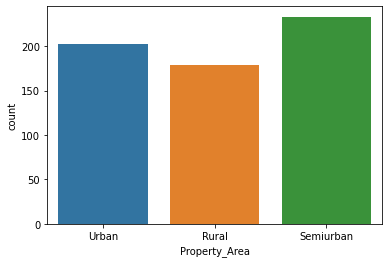

In [37]:
#Count plot for Property_Area
sns.countplot(df['Property_Area']);

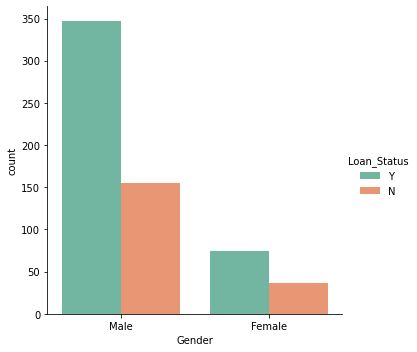

In [38]:
#Most of the loan applicants are having property in Semiurban are and very less people have property in Rural area.

#Factor plot for Gender
sns.factorplot('Gender',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);


In [39]:
# male gets more approved loan.

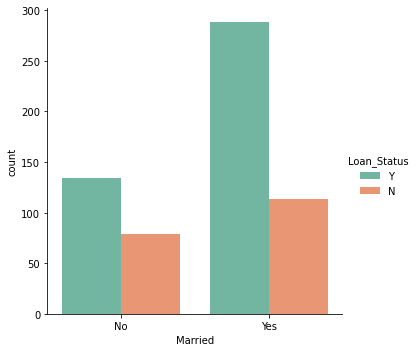

In [42]:
#Factor plot for Married
sns.factorplot('Married',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

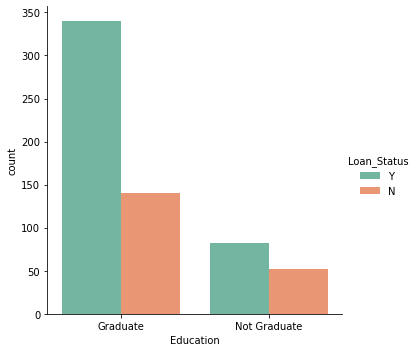

In [41]:
#Factor plot for Education
sns.factorplot('Education',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

Graduated people has more chance of getting loan approved.

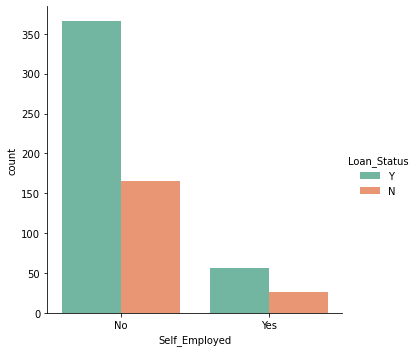

In [43]:
#Factor plot for Self_Employed
sns.factorplot('Self_Employed',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

In [ ]:
#The applicants who are not self employed has more chance of getting loan approved.

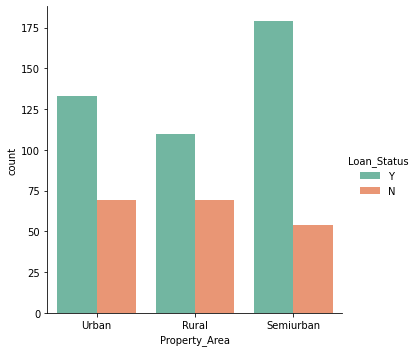

In [44]:
#Factor plot for Property_Area
sns.factorplot('Property_Area',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

In [45]:
#Applicants having property in semiurban area has more chance of getting loan approved.

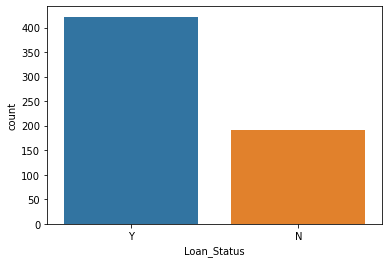

In [46]:
#Count plot for Loan_Status
sns.countplot(df['Loan_Status']);

In [ ]:
# By looking into the count plot of target column i can say that the data is imbalanced and i need to balance it.

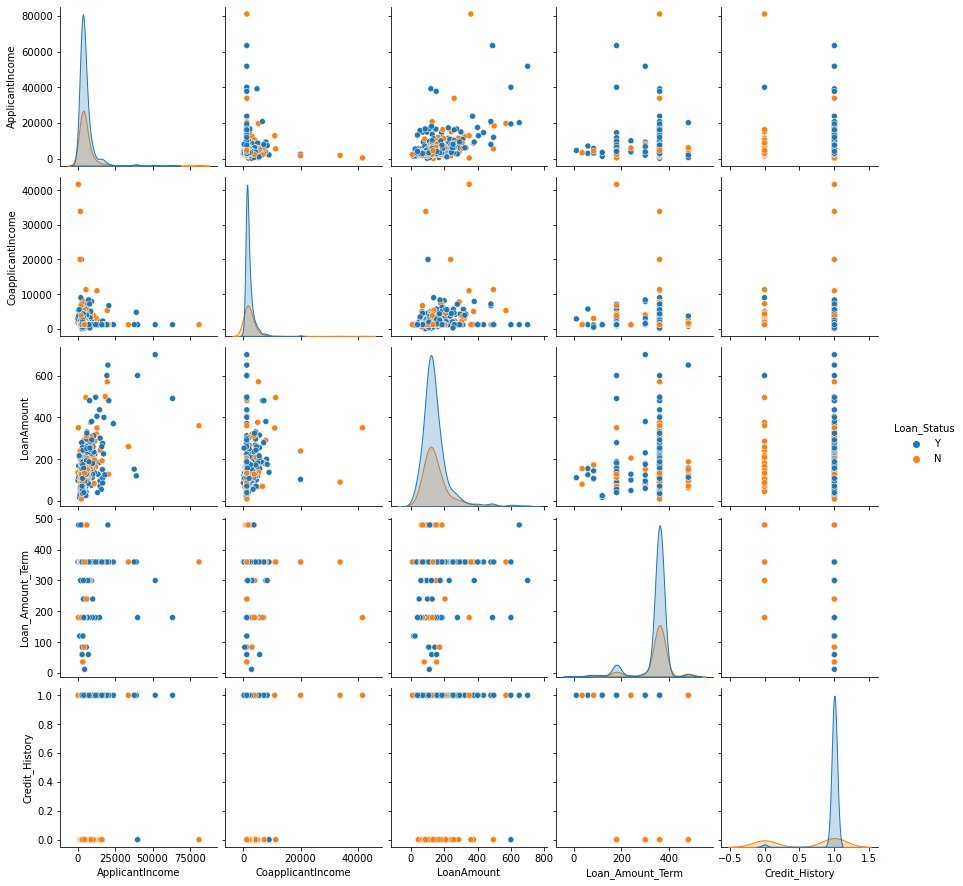

In [47]:
#pair ploting for df
sns.pairplot(df,hue="Loan_Status")

Data Cleaning:
Checking for outliers:


<AxesSubplot:>

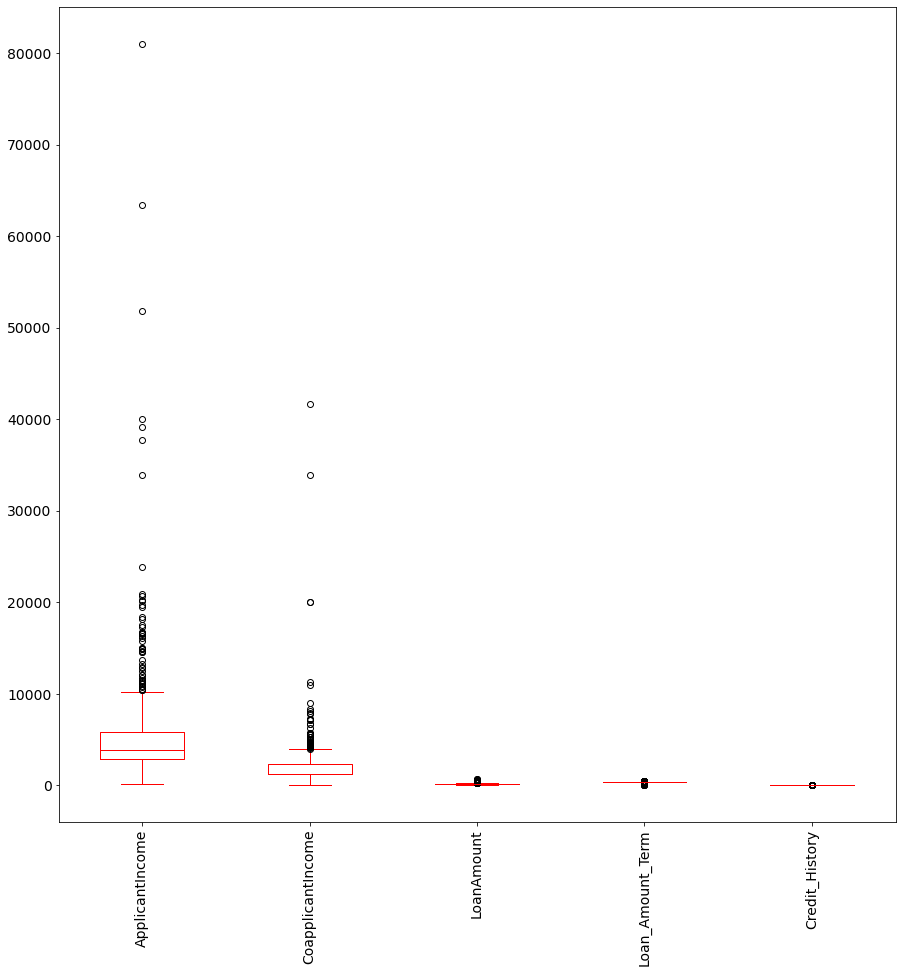

In [49]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(15,15),color='r')

In [53]:
#Features having outliers
features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]


In [54]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1188.5,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1188.5,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1188.5,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1188.5,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1188.5,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1188.5,187.0,360.0,1.0,Urban,Y


In [55]:
#Checking shape of new dataset
df_new.shape

(577, 12)

In [56]:
#Checking shape of old dataset
df.shape

(614, 12)

In [57]:
#Checking dataloss in zscore method
Dataloss = (((614-577)/614)*100)
Dataloss

6.026058631921824

In [58]:
#Checking for skewness
df_new.skew()

ApplicantIncome      2.148522
CoapplicantIncome    2.326156
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

In [59]:
#Creating a list of skewed features
fea=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

In [60]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [61]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [62]:
#Checking skewness again
df_new[fea].skew()

ApplicantIncome      0.027981
CoapplicantIncome    0.079601
LoanAmount           0.048425
dtype: float64

In [63]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [64]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)
df_new[cat_col].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [65]:
cor=df_new.corr()

In [66]:
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.137334,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.139109,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,-0.066972,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,-0.060180,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.012839,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.185490,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.137334,0.139109,-0.066972,-0.060180,-0.012839,-0.185490,1.000000,0.304356,-0.068870,-0.032656,-0.082216,0.000762
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.304356,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,-0.068870,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,-0.032656,-0.003626,0.027392,1.000000,-0.008121,0.560936


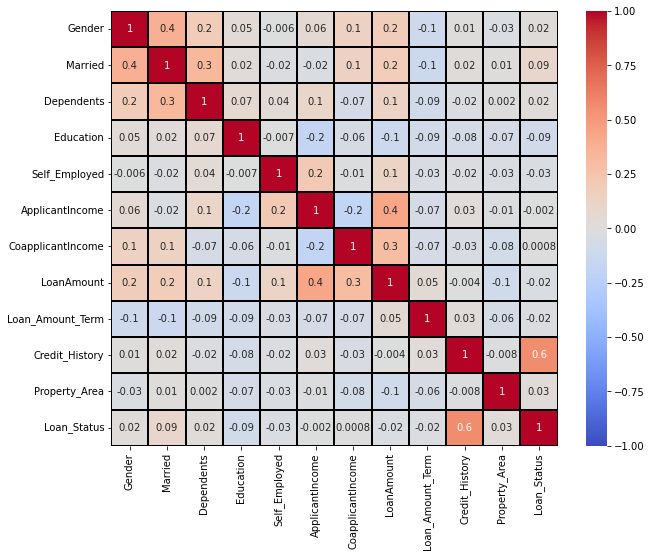

In [67]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);
